# Tutorial de Pandas

In [8]:
import pandas as pd

# Cargar dataset "tips" (incluido en la librería seaborn)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Mostrar primeras filas
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [9]:
# Estadísticas descriptivas
print(df.describe())

# Contar valores únicos en columnas categóricas
print("\nDías de la semana:", df['day'].unique())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Días de la semana: ['Sun' 'Sat' 'Thur' 'Fri']


In [10]:
# Ver valores nulos
print(df.isnull().sum())

# Crear nueva columna: porcentaje de propina
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


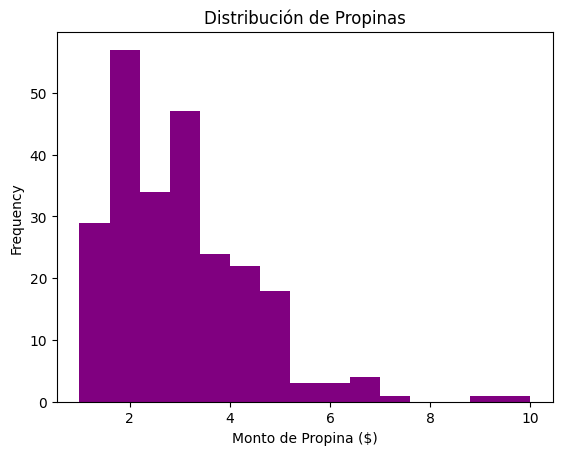

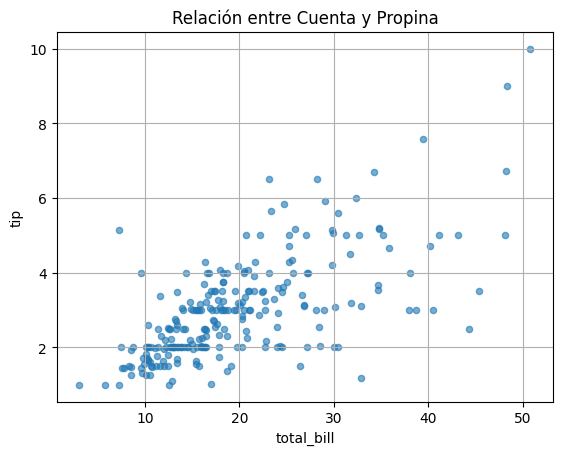

In [11]:
import matplotlib.pyplot as plt

# Histograma de propinas
df['tip'].plot(kind='hist', bins=15, color='purple')
plt.title('Distribución de Propinas')
plt.xlabel('Monto de Propina ($)')
plt.show()

# Gráfico de dispersión: total_bill vs. tip
df.plot(kind='scatter', x='total_bill', y='tip', alpha=0.6)
plt.title('Relación entre Cuenta y Propina')
plt.grid(True)
plt.show()

In [12]:
# Agrupar por día y calcular promedio de propinas
print(df.groupby('day')['tip'].mean())

# Filtrar datos (ejemplo: cenas con propina > 20%)
high_tips = df[(df['time'] == 'Dinner') & (df['tip_percentage'] > 20)]

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [14]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
!
import seaborn as sns

# Cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100  # Columna adicional

Compara cómo varían los montos de las cuentas entre almuerzos (Lunch) y cenas (Dinner) por día.

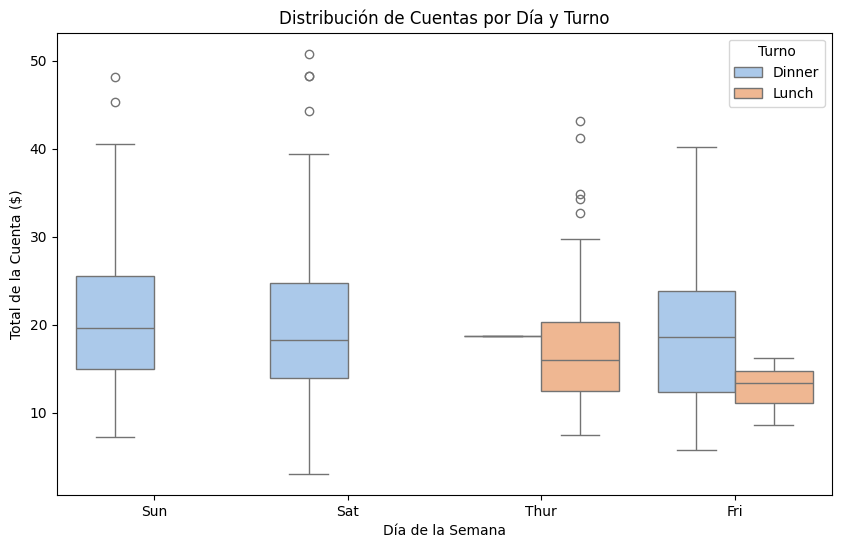

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', hue='time', data=df, palette='pastel')
plt.title('Distribución de Cuentas por Día y Turno')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de la Cuenta ($)')
plt.legend(title='Turno')
plt.show()

Muestra la correlación positiva entre el monto de la cuenta y la propina, con una línea de tendencia.

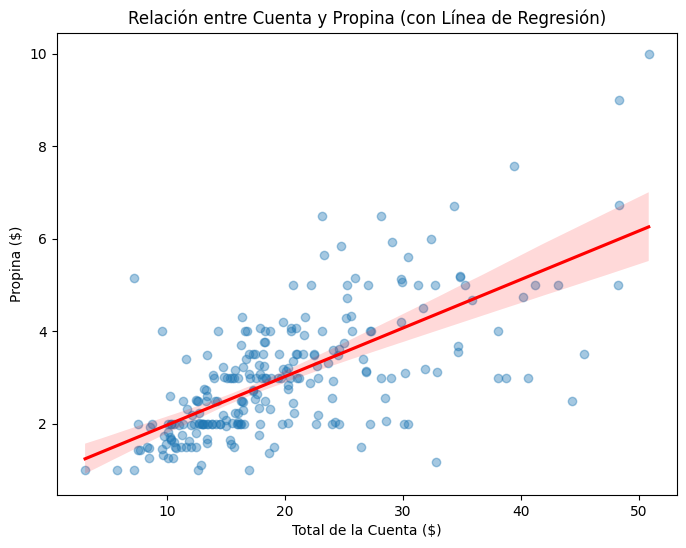

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relación entre Cuenta y Propina (con Línea de Regresión)')
plt.xlabel('Total de la Cuenta ($)')
plt.ylabel('Propina ($)')
plt.show()

Revela si hay diferencias en la generosidad (% de propina) entre hombres (Male) y mujeres (Female).

/var/folders/qh/5bmv1f155j34j21jkvcw3blh0000gn/T/ipykernel_3371/2785407382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='tip_percentage', data=df, palette='coolwarm', split=True)


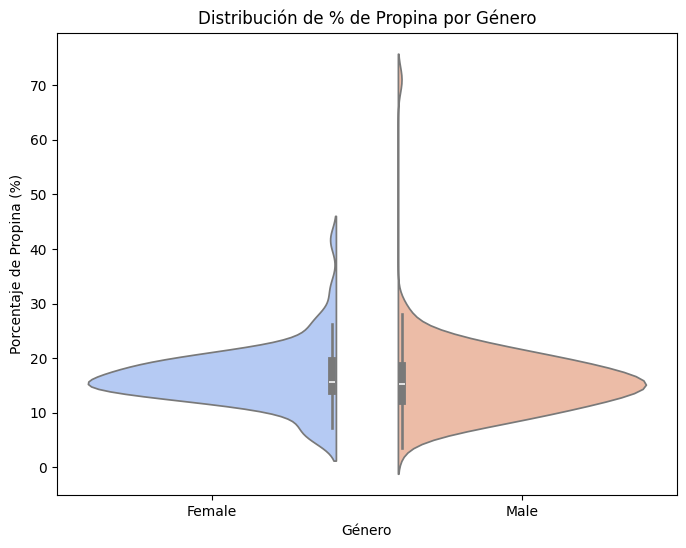

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='tip_percentage', data=df, palette='coolwarm', split=True)
plt.title('Distribución de % de Propina por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Propina (%)')
plt.show()

Muestra el porcentaje de clientes fumadores (Yes) vs no fumadores (No).

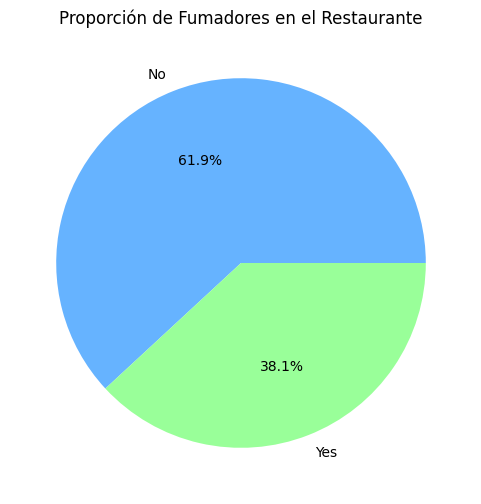

In [19]:
# Contar fumadores vs no fumadores
counts = df['smoker'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Fumadores en el Restaurante')
plt.show()

Identifica relaciones estadísticas entre variables (ej: size vs total_bill).

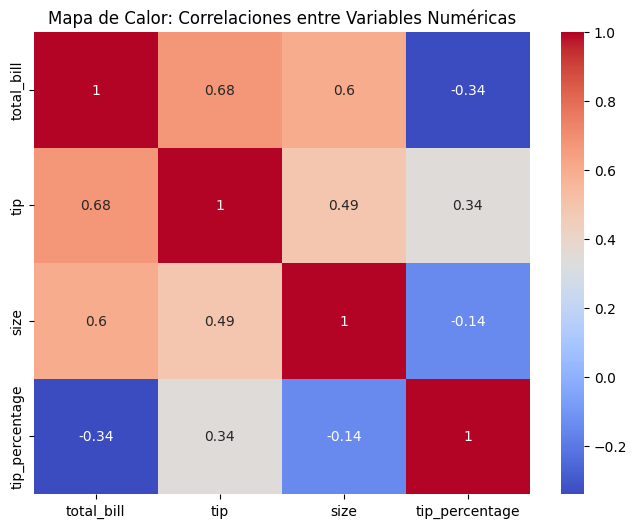

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['total_bill', 'tip', 'size', 'tip_percentage']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor: Correlaciones entre Variables Numéricas')
plt.show()

Compara cómo se distribuyen las propinas en almuerzos vs cenas (ej: "El 80% de las cenas recibe propinas ≤ $4").

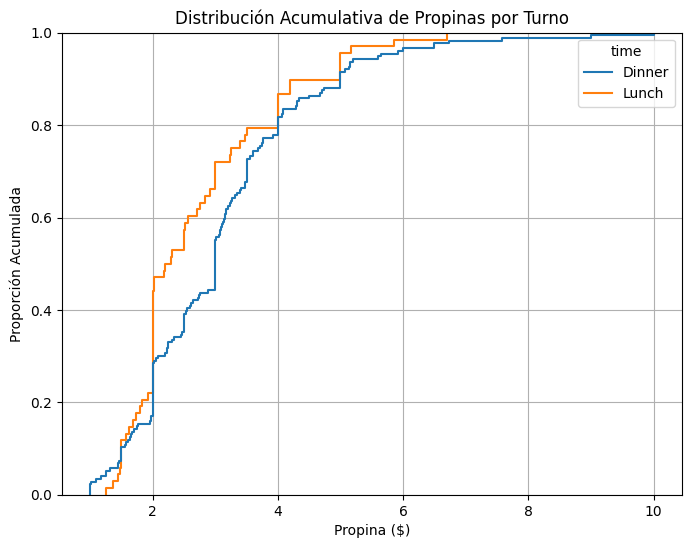

In [21]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=df, x='tip', hue='time', stat='proportion')
plt.title('Distribución Acumulativa de Propinas por Turno')
plt.xlabel('Propina ($)')
plt.ylabel('Proporción Acumulada')
plt.grid(True)
plt.show()

/var/folders/qh/5bmv1f155j34j21jkvcw3blh0000gn/T/ipykernel_3371/2843312841.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='size', data=df, palette='Blues_d')


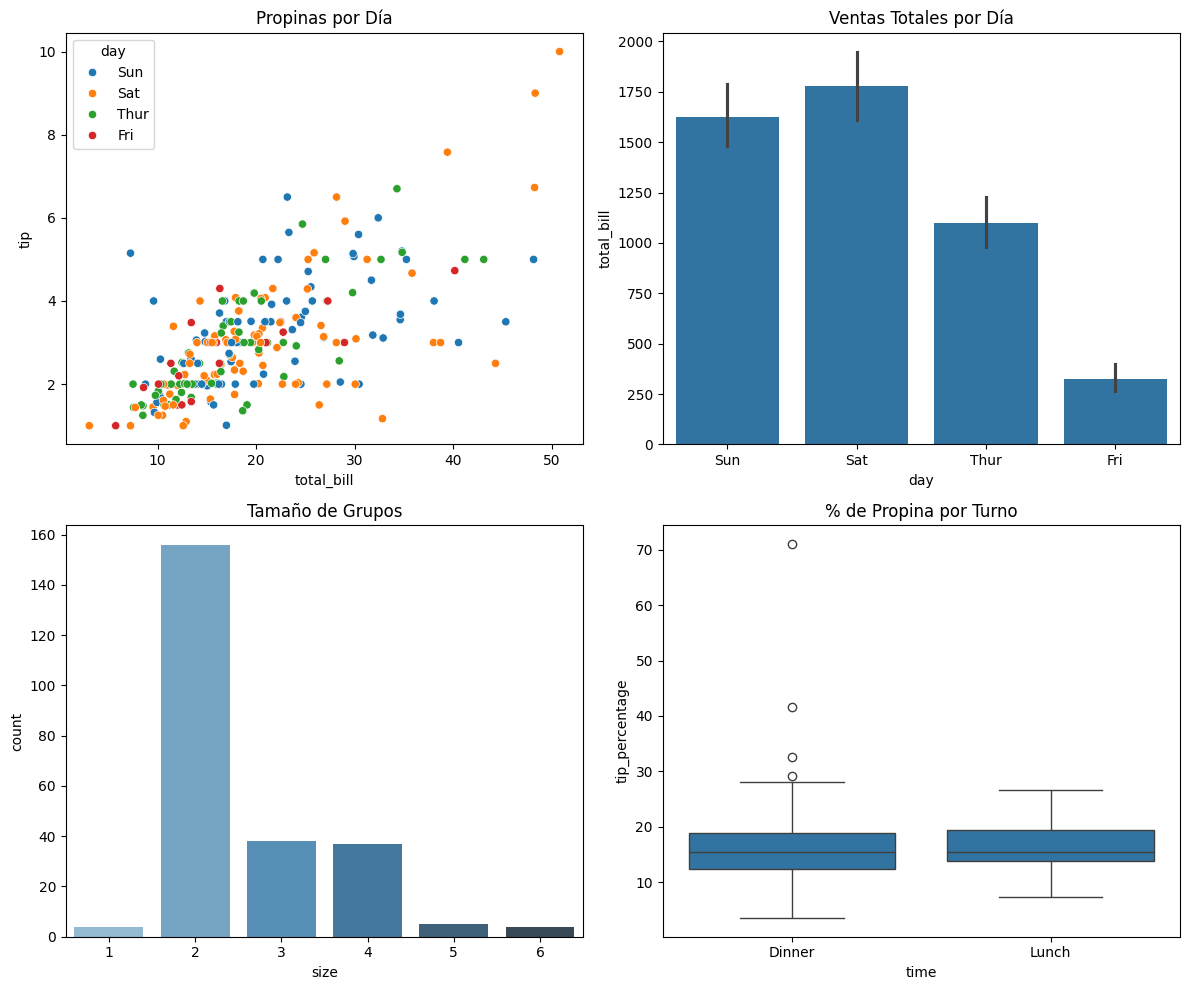

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1
sns.scatterplot(ax=axes[0, 0], x='total_bill', y='tip', hue='day', data=df)
axes[0, 0].set_title('Propinas por Día')

# Gráfico 2
sns.barplot(ax=axes[0, 1], x='day', y='total_bill', estimator=sum, data=df)
axes[0, 1].set_title('Ventas Totales por Día')

# Gráfico 3
sns.countplot(ax=axes[1, 0], x='size', data=df, palette='Blues_d')
axes[1, 0].set_title('Tamaño de Grupos')

# Gráfico 4
sns.boxplot(ax=axes[1, 1], x='time', y='tip_percentage', data=df)
axes[1, 1].set_title('% de Propina por Turno')

plt.tight_layout()
plt.show()

# Ejercicio de Tarea PANDAS

Ejercicio en el cual se usan algunas funciones básicas de PANDAS y la libreria maplotlib

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/animal-crossing-new-horizons-nookplaza-dataset")

print("Path to dataset files:", path)

100%|██████████| 577k/577k [00:00<00:00, 81.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset/versions/3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The data I will use
df=pd.read_csv(path+"/accessories.csv")
df.head(4).T

,0,1,2,3
Name,3D glasses,3D glasses,bandage,beak
Variation,White,Black,Beige,Yellow
DIY,No,No,No,No
Buy,490,490,140,490
Sell,122,122,35,122
Color 1,White,Black,Beige,Yellow
Color 2,Colorful,Colorful,White,Yellow
Size,1x1,1x1,1x1,1x1
Miles Price,NaN,NaN,NaN,NaN
Source,Able Sisters,Able Sisters,Able Sisters,Able Sisters


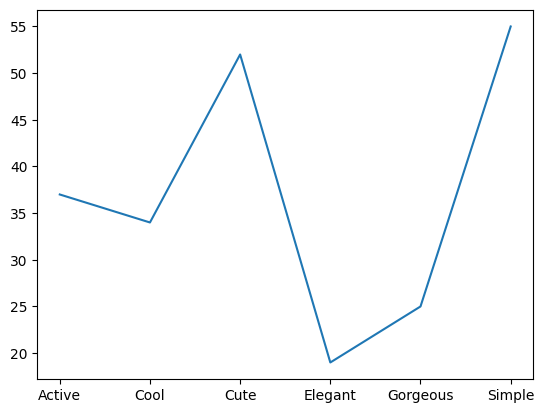

In [ ]:
style=df.groupby(["Style"]).count()["Unique Entry ID"]
plt.plot(style.index,style.values)
plt.show()

F


Educational level

```
# education=['primaria','basica',pregrado','postgrado']
```

Is Student

```
estudent=[0,1]
```

City of birth

```
# city=['Bogotá','Medellín','Teheran']
```

Temperature

```
# temperature=[0.3,1.5,2.6,30.6,40.5]
```

Area code

```
# zip_code=['0001','2312','5698']
```

favorite sport

```
# sports=['soccer','baseball','basketball','bowling']
```







